<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Regression/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:

#Read the csv file , understand contents
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head(5)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [347]:
print('Data Set has rows {}, columns {}'.format( df.shape[0], df.shape[1]))
print('Data set has columns {}'.format(df.columns.values))

Data Set has rows 4340, columns 8
Data set has columns ['name' 'year' 'selling_price' 'km_driven' 'fuel' 'seller_type'
 'transmission' 'owner']


In [348]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [349]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [350]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [351]:
df=df.drop_duplicates()
df.shape

(3577, 8)

In [352]:

#Look for unique values in each column
for col in df.columns:
  print('Column {} has {} unique values'.format(col,df[col].nunique()))


Column name has 1491 unique values
Column year has 27 unique values
Column selling_price has 445 unique values
Column km_driven has 770 unique values
Column fuel has 5 unique values
Column seller_type has 3 unique values
Column transmission has 2 unique values
Column owner has 5 unique values


In [353]:
df['company'] =df['name'].map(lambda x : x.split(' ')[0])

unique_car_company=df['company'].unique()
type(unique_car_company)
#print(unique_car_company)
#df['company_num']=df['company'].map(lambda x : unique_car_company[x])

<ipython-input-353-4a282760eb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company'] =df['name'].map(lambda x : x.split(' ')[0])


numpy.ndarray

In [354]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
df['company_enc']=le.fit_transform(df['company'])
df['fuel_enc']=le.fit_transform(df['fuel'])
df['seller_type_enc']=le.fit_transform(df['seller_type'])
df['transmission_enc']=le.fit_transform(df['transmission'])
df['owner_enc']=le.fit_transform(df['owner'])

<ipython-input-354-0785c8a763fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_enc']=le.fit_transform(df['company'])
<ipython-input-354-0785c8a763fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_enc']=le.fit_transform(df['fuel'])
<ipython-input-354-0785c8a763fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [355]:
df[['owner_enc','owner']].value_counts()

,,count
owner_enc,owner,
0,First Owner,2218
2,Second Owner,978
4,Third Owner,289
1,Fourth & Above Owner,75
3,Test Drive Car,17


In [356]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,company_enc,fuel_enc,seller_type_enc,transmission_enc,owner_enc
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,10,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,5,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9,1,1,1,2


<Axes: xlabel='company', ylabel='selling_price'>

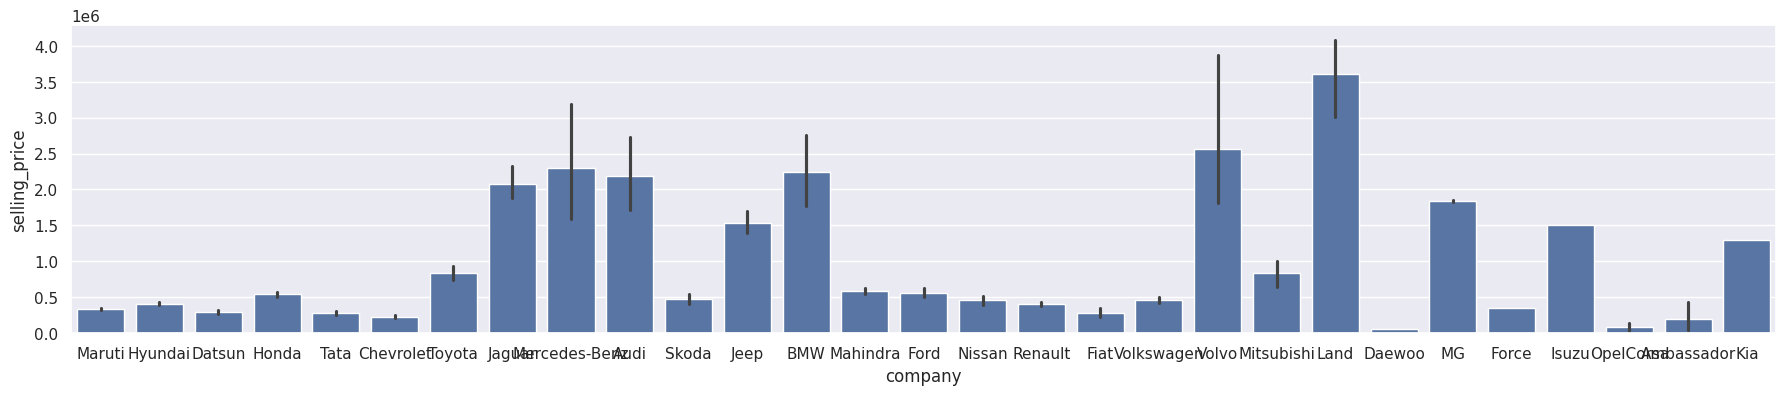

In [357]:
sns.set(rc={"figure.figsize":(22, 4)})
sns.barplot(x ='company', y ='selling_price', data = df)

<Axes: xlabel='transmission', ylabel='selling_price'>

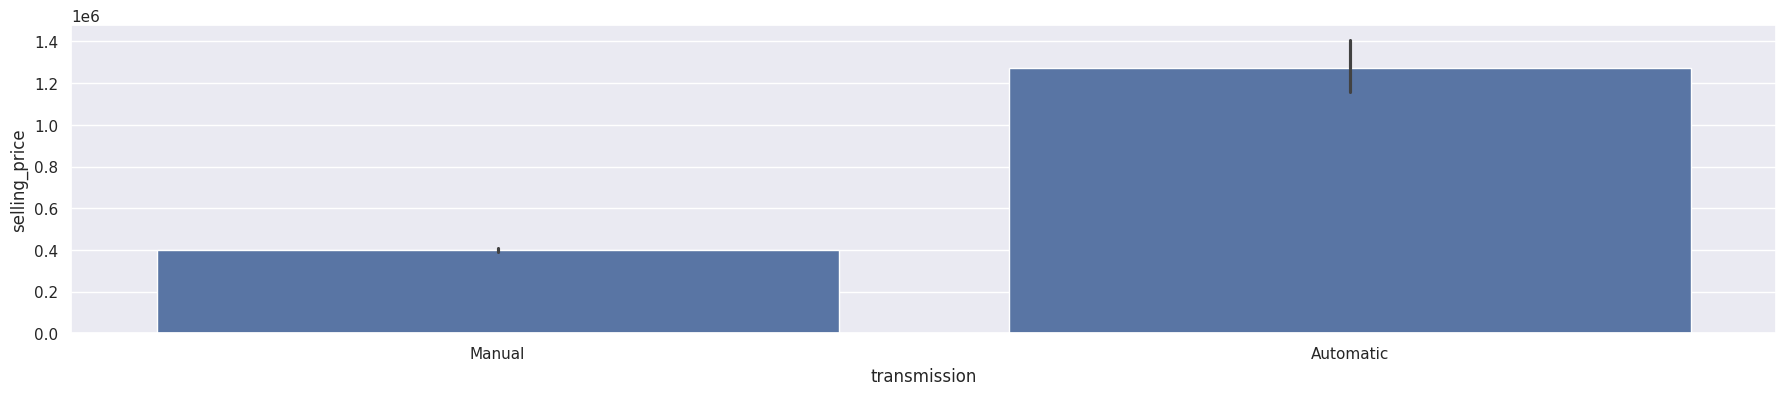

In [358]:
sns.barplot(x ='transmission', y ='selling_price', data = df)

<Axes: xlabel='fuel', ylabel='selling_price'>

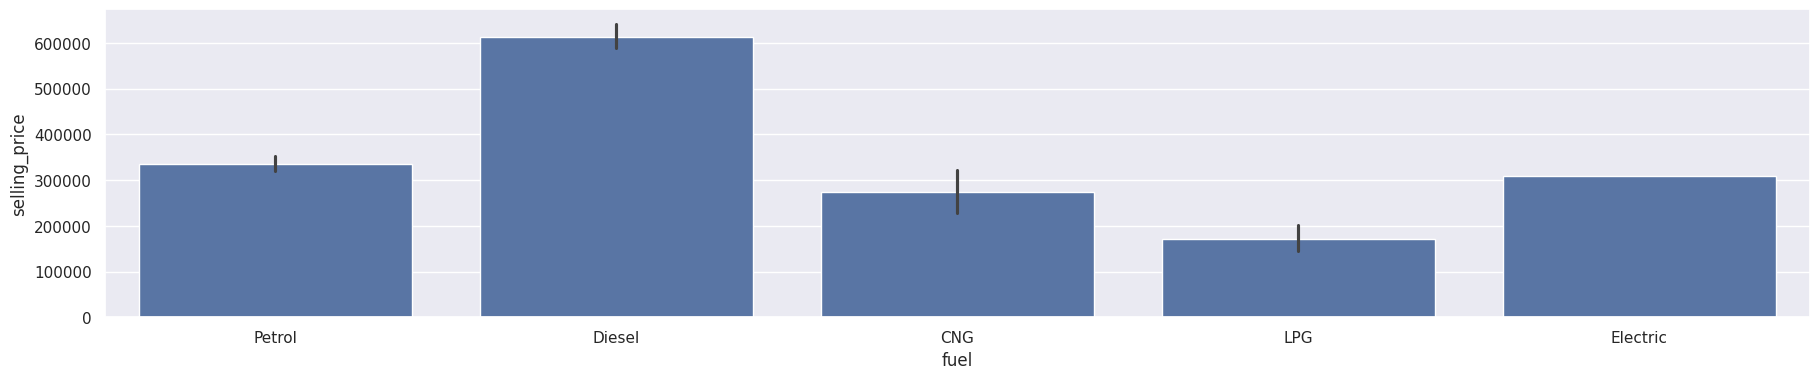

In [359]:
sns.barplot(x ='fuel', y ='selling_price', data = df)

<Axes: xlabel='owner', ylabel='selling_price'>

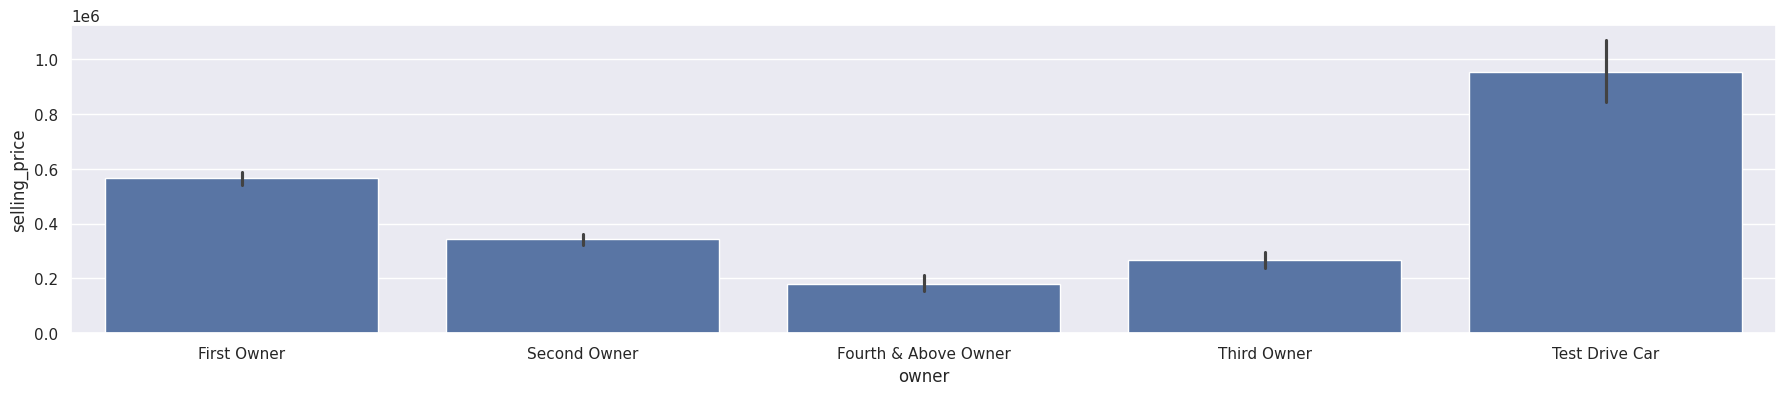

In [360]:
sns.barplot(x ='owner', y ='selling_price', data = df)


In [361]:
df[['owner_enc','owner']].value_counts()

,,count
owner_enc,owner,
0,First Owner,2218
2,Second Owner,978
4,Third Owner,289
1,Fourth & Above Owner,75
3,Test Drive Car,17


<Axes: xlabel='km_driven', ylabel='selling_price'>

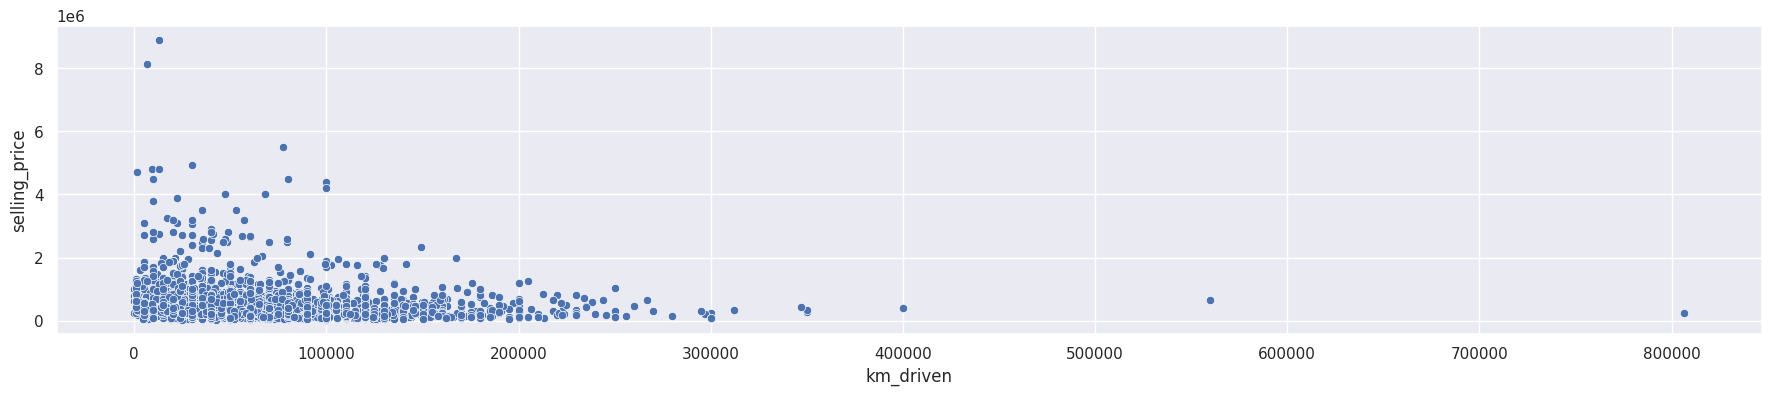

In [362]:
sns.scatterplot(data=df, x='km_driven', y='selling_price')

<Axes: xlabel='year', ylabel='selling_price'>

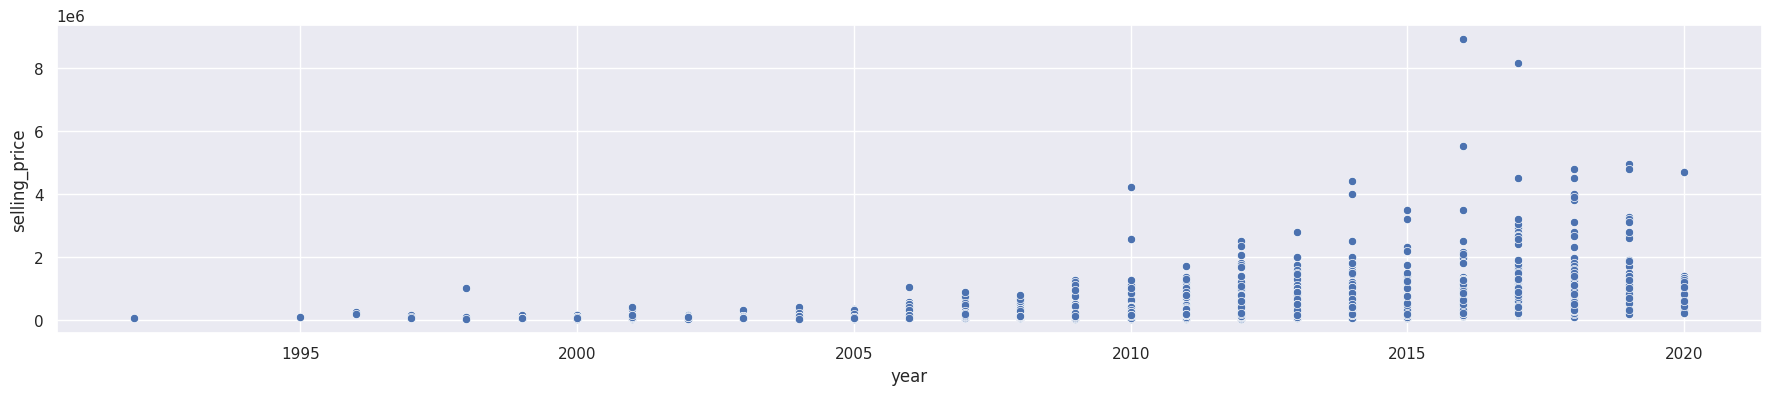

In [363]:
sns.scatterplot(data=df, x='year', y='selling_price')
# Year does not have any distribution.

<Axes: xlabel='seller_type', ylabel='selling_price'>

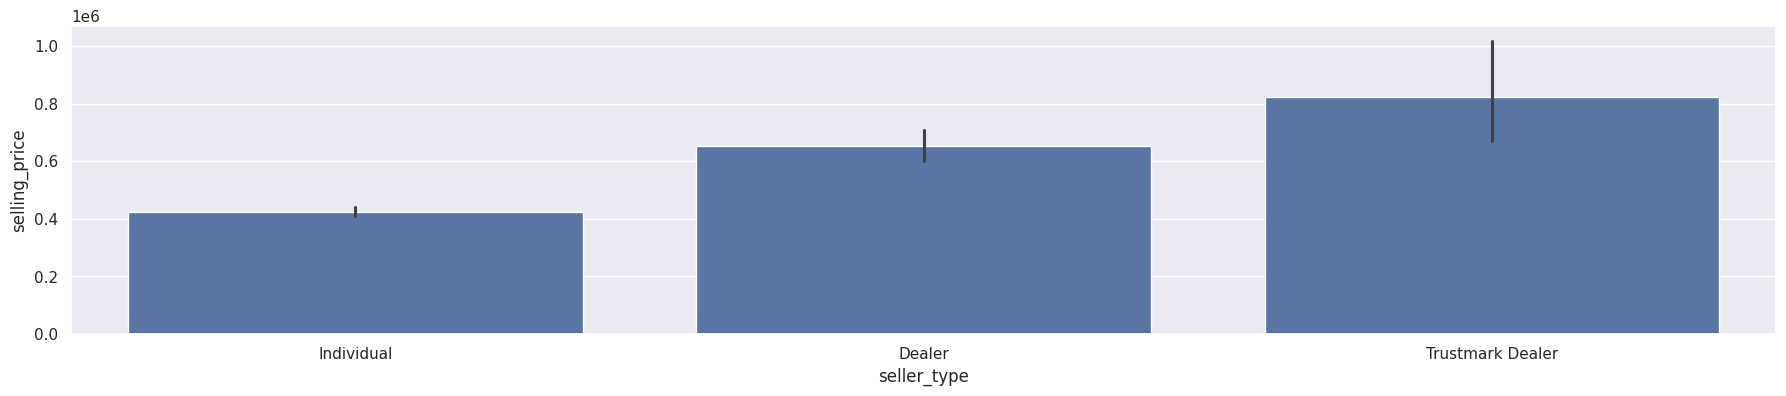

In [364]:
sns.barplot(x ='seller_type', y ='selling_price', data = df)

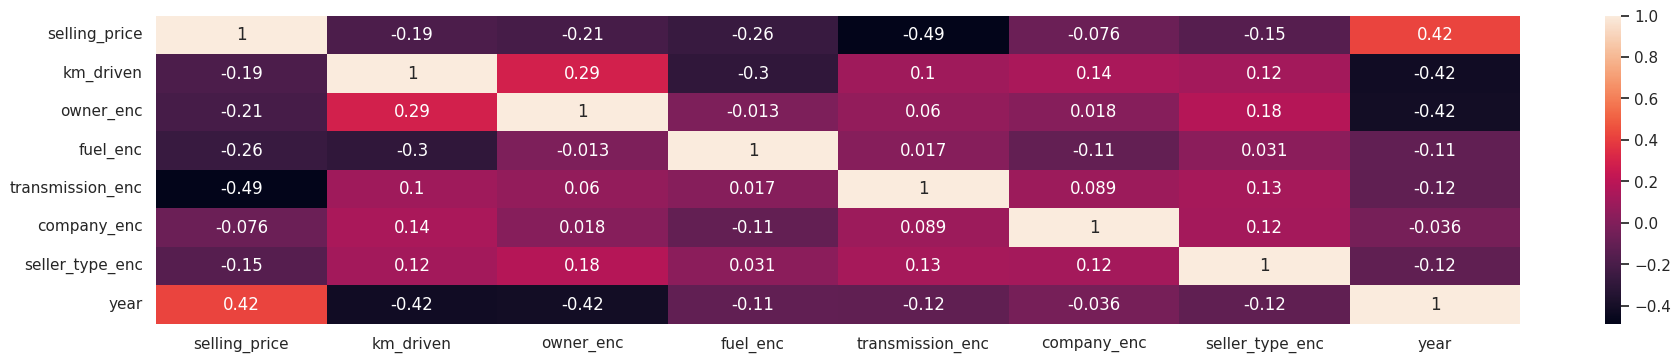

In [365]:
corr = df[['selling_price','km_driven','owner_enc','fuel_enc','transmission_enc','company_enc','seller_type_enc','year']].corr()
sns.heatmap(corr, annot=True)
plt.show()

<font color='green'>
feature variable - year and transmission . the correlation between year and transmission_enc is -0.12 which is small. so we can consider year and transmission_enc.</font>

In [366]:
X=np.array(df['year']).reshape(-1,1)
#X=df[['year','transmission_enc','fuel_enc','owner_enc']]
Y=np.array(df['selling_price']).reshape(-1,1)

In [367]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X, Y)
print(model.coef_)
print(model.intercept_)
Y_pred_selling_price=model.predict(X)

[[50820.47762975]]
[-1.01825805e+08]


In [368]:
from sklearn.metrics import r2_score
r2_score(Y, Y_pred_selling_price)

0.17999661679061396

<font color='green'>With different feature variable r2_score : </br> year - 0.179 </br> year and transmission_enc - 0.37339 </br> year , transmission and km_driven - 0.37539 <b> not much change as km_driven and year are highly correlated. </b></br> year, transmission and fuel - 0.418 </br> year , transmission , fuel and owner - 0.421 </font>

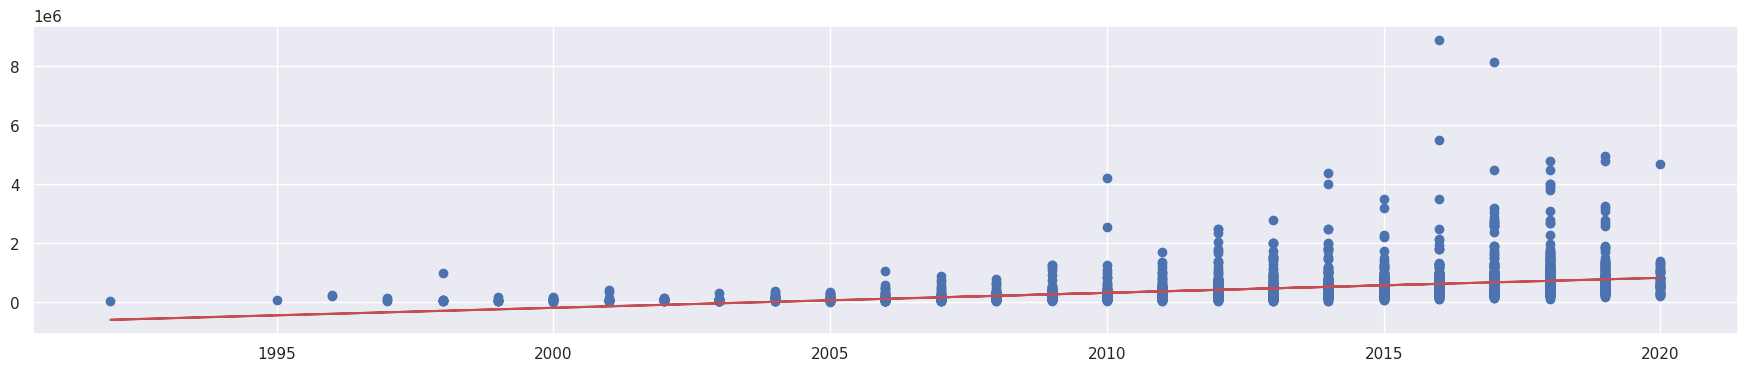

In [369]:
plt.scatter(X,Y)
plt.plot(X,Y_pred_selling_price, color='r')

# Next we are removing the out liers and then see the accuracy of model

In [370]:
df.describe()

,year,selling_price,km_driven,company_enc,fuel_enc,seller_type_enc,transmission_enc,owner_enc
count,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,15.695555,2.442270,0.810176,0.912776,0.905228
std,4.251759,5.093018e+05,47579.940016,6.711152,1.508582,0.415078,0.282202,1.277152
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000e+05,36000.000000,10.000000,1.000000,1.000000,1.000000,0.000000
50%,2013.000000,3.500000e+05,60000.000000,18.000000,1.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,18.000000,4.000000,1.000000,1.000000,2.000000
max,2020.000000,8.900000e+06,806599.000000,28.000000,4.000000,2.000000,1.000000,4.000000


In [371]:
#df.shape
#print((25/100) * 3578 ) 895
#df['selling_price']=sorted(df['selling_price'], reverse=False)


<Axes: xlabel='selling_price'>

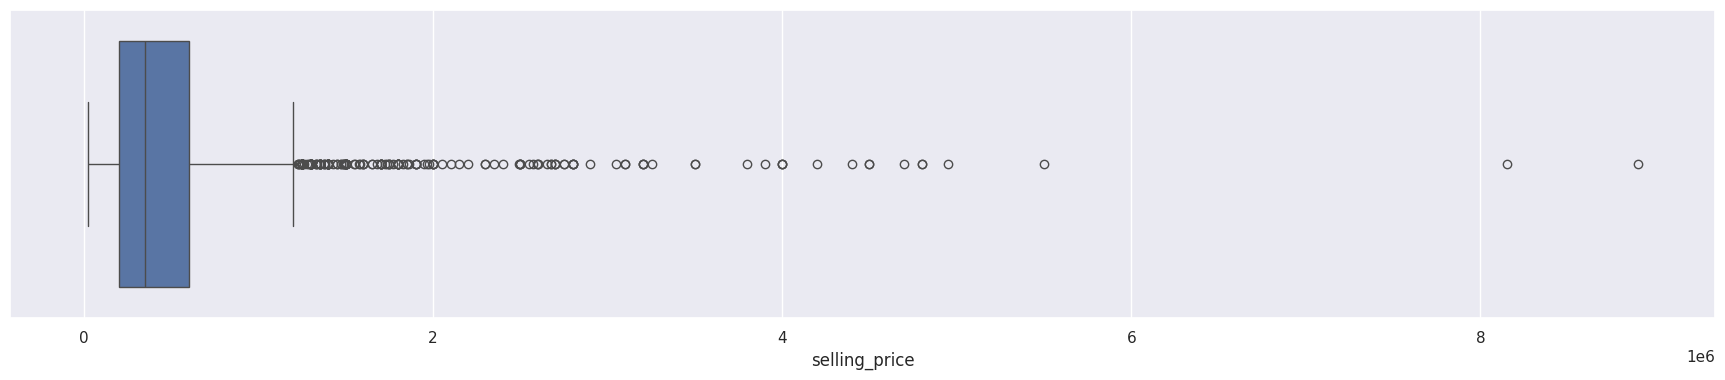

In [372]:
sns.boxplot(x=df["selling_price"])

<Axes: xlabel='year'>

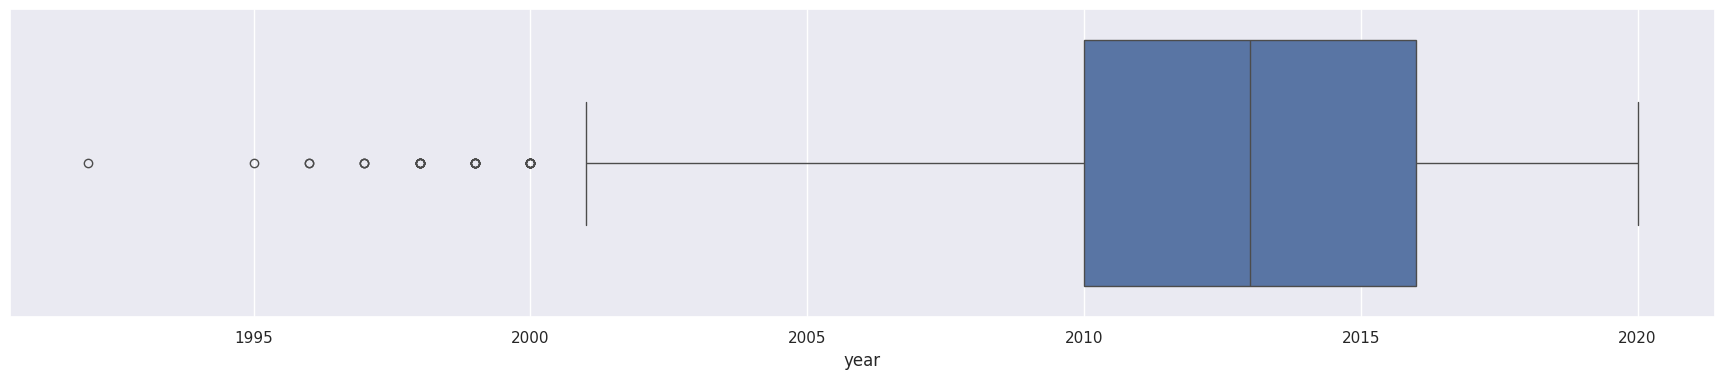

In [381]:
sns.boxplot(x=df["year"])

Percentile Formula : nth percentile = n/100 * total number of values

In [373]:
def remove_outlier(Q1, Q3, df):
  lowerF= Q1 - 1.5 *(Q3-Q1)
  higherF= Q3 + 1.5 * (Q3-Q1)
  print('Shape before remving outliers {}', df.shape)
  initial_size =df.shape
  df=df.drop(df[(df['selling_price'] < lowerF) | (df['selling_price'] > higherF)].index)
  print('{} outlier selling_price records removed', (initial_size[0]) - df.shape[0])
  print('Shape before remving outliers {}', df.shape)
  return df

Remvoing outliers from target feature selling_price

Shape before remving outliers {} (3577, 14)
{} outlier selling_price records removed 170
Shape before remving outliers {} (3407, 14)


<Axes: xlabel='selling_price'>

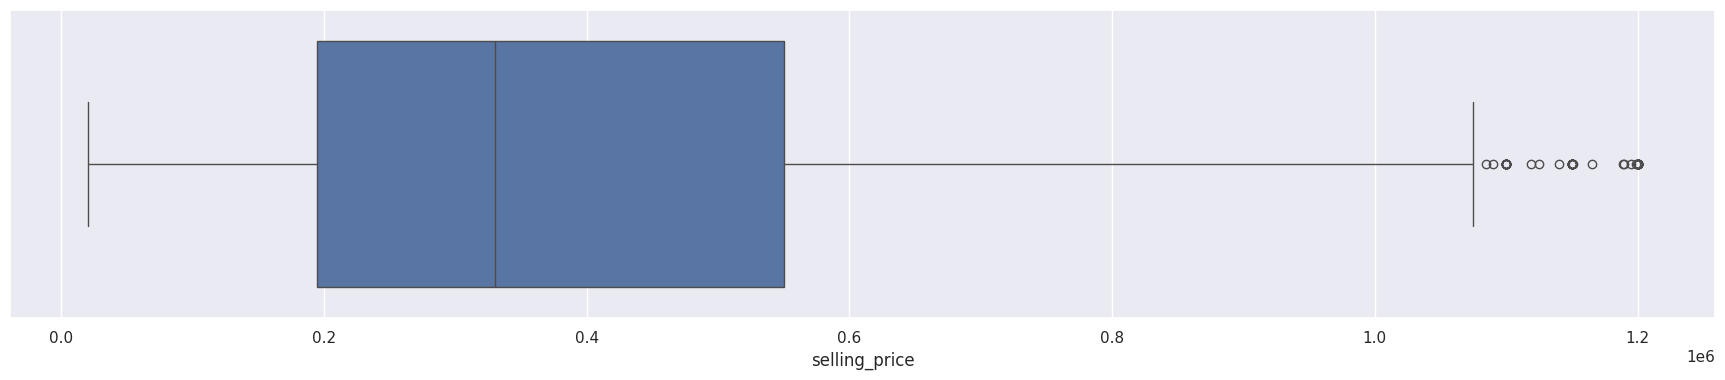

In [374]:
df=remove_outlier(200000, 600000, df)

sns.boxplot(x=df["selling_price"])

In [375]:
def outliers(col):
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    print(q1)
    print(q3)
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    hf= q3 + 1.5 * iqr
    return lf,hf

In [376]:
#outliers(df[['selling_price']])

195000.0
550000.0


(-337500.0, 1082500.0)

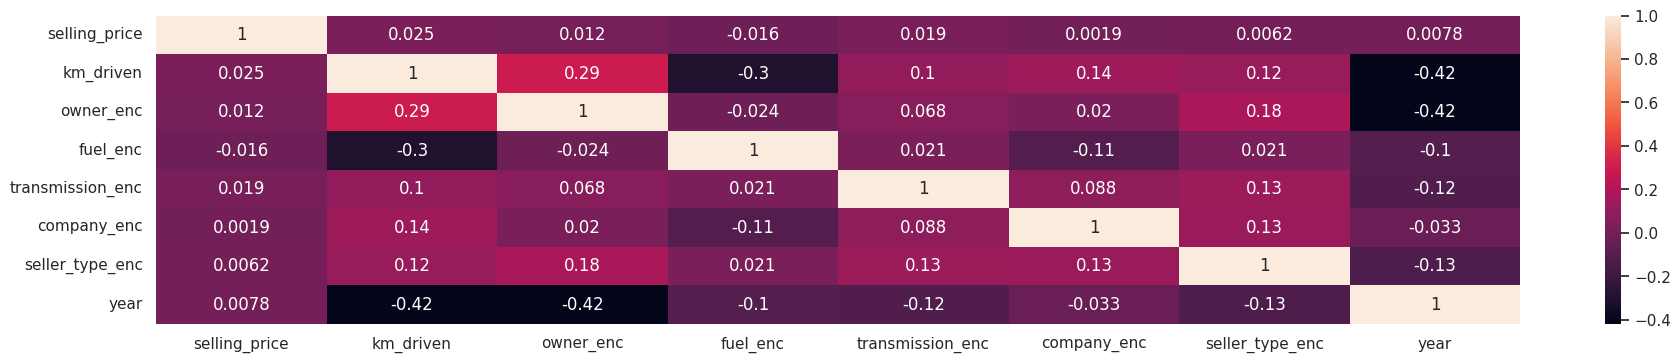

In [382]:
corr = df[['selling_price','km_driven','owner_enc','fuel_enc','transmission_enc','company_enc','seller_type_enc','year']].corr()
sns.heatmap(corr, annot=True)
plt.show()

<font color='red'>
The correlation reduces after removing the out liers of target feature selling Price. </br>
<span>Do we have to remove outliers of feature variables or how do we decide which column outliers need to be removed?? </span>
</font>

In [377]:
X_=np.array(df['year']).reshape(-1,1)
#X_=df[['year','transmission_enc','fuel_enc']]
Y_=np.array(df['selling_price']).reshape(-1,1)

In [378]:
from sklearn.linear_model import LinearRegression
model_= LinearRegression()
model_.fit(X_, Y_)
print(model_.coef_)
print(model_.intercept_)

[[466.71029563]]
[-547587.94165815]


In [379]:
Y_pred_selling_price=model_.predict(X_)

In [380]:
from sklearn.metrics import r2_score
r2_score(Y_, Y_pred_selling_price)

6.144662105589394e-05

<font color='red'>
The accracy of the model decreases when outliers of target feature selling_price are removed ??????? </br>
With different feature variable r2_score : </br> year -.0000614 </br> year and transmission_enc - 0.00046 </br> year , transmission and km_driven - 0.0013 <b> not much change as km_driven and year are highly correlated. </b></br> year, transmission and fuel - 0.418 </br> year , transmission , fuel and owner - 0.421 </font>